# Semi-supervised algorithm
- 전체 데이터에서 아주 낮은 비율의 labeling이 있는 자료를 지도학습하여 비지도학습을 하는 알고리즘

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 명령 결과 모두 보기
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import warnings
warnings.filterwarnings(action='ignore')

## 데이터 생성

In [2]:
from sklearn import datasets
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


무작위 난수를 발생시켜 0.3미만인 index에 해당되는 'target'를 '-1'로 변환

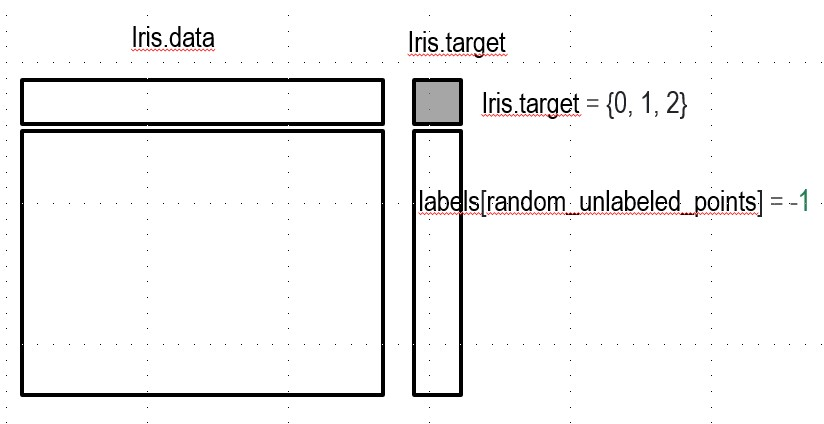

In [11]:
from IPython.display import Image
Image(filename='../image/unsupervised/semi.jpg', width=600, height=400)

In [12]:
rng = np.random.RandomState(42)
random_unlabeled_points = rng.rand(len(iris.target)) < 0.3
df.loc[random_unlabeled_points, 'target'] = -1
df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
27,5.2,3.5,1.5,0.2,0
62,6.0,2.2,4.0,1.0,1
125,7.2,3.2,6.0,1.8,2
123,6.3,2.7,4.9,1.8,-1
29,4.7,3.2,1.6,0.2,-1


# 1. LabelPropagaton
This model is similar to the basic Label Propagation algorithm, but uses affinity matrix based on the normalized graph Laplacian and soft clamping across the labels.

In [13]:
from sklearn.semi_supervised import LabelPropagation
label_prop_model = LabelPropagation()
label_prop_model.fit(df.drop('target', axis=1), df['target'])

LabelPropagation()

### 예측 데이터의 정확도(accuracy)

In [14]:
y_predict = label_prop_model.predict(df.drop('target', axis=1))
np.sum(y_predict == df['target']) / df.shape[0]

0.66

#### 데이터를 numpy로 

In [15]:
labels = np.copy(iris.target)
labels[random_unlabeled_points] = -1
label_prop_model.fit(iris.data, labels)
y_predict = label_prop_model.predict(iris.data)
np.sum(y_predict == df['target']) / len(y_predict)

LabelPropagation()

0.66

# 2. LabelSpreading
This model is similar to the basic Label Propagation algorithm, but uses affinity matrix based on the normalized graph Laplacian and soft clamping across the labels.

In [16]:
from sklearn.semi_supervised import LabelSpreading
label_spre_model = LabelSpreading()
label_spre_model.fit(df.drop('target', axis=1), df['target'])

LabelSpreading()

### 예측 데이터의 정확도(accuracy)

In [17]:
y_predict = label_spre_model.predict(df.drop('target', axis=1))
np.sum(y_predict == df['target']) / df.shape[0]

0.66

## 3. 예제 (Label Propagation digits: Demonstrating performance)
This example demonstrates the power of semisupervised learning by training a Label Spreading model to classify handwritten digits with sets of very few labels.

The handwritten digit dataset has 1797 total points. The model will be trained using all points, but only 30 will be labeled. Results in the form of a confusion matrix and a series of metrics over each class will be very good.

At the end, the top 10 most uncertain predictions will be shown.

https://scikit-learn.org/stable/auto_examples/semi_supervised/plot_label_propagation_digits.html

In [18]:
from sklearn.metrics import confusion_matrix, classification_report
from scipy import stats

digits = datasets.load_digits()
rng = np.random.RandomState(2)
indices = np.arange(len(digits.data))
indices

array([   0,    1,    2, ..., 1794, 1795, 1796])

인덱스를 무작위 shuffle

In [19]:
rng.shuffle(indices)
indices

array([ 154,  564, 1444, ...,  493,  527, 1192])

In [20]:
digits.keys()
digits.data.shape
digits.data
digits.target

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

(1797, 64)

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

array([0, 1, 2, ..., 8, 9, 8])

In [21]:
digits.images.shape
digits.images[0:2]

(1797, 8, 8)

array([[[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
        [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
        [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
        [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
        [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
        [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
        [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
        [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
        [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
        [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
        [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
        [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
        [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
        [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
        [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]]])

In [22]:
X = digits.data[indices[:340]]
y = digits.target[indices[:340]]
images = digits.images[indices[:340]]

무작위 shuffling한 인덱스에 label 자료는 40개, unlabel 자료는 300개 생성

In [23]:
n_total_samples = len(y); n_total_samples 
n_labeled_points = 40 

340

In [24]:
indices = np.arange(n_total_samples)
unlabeled_set = indices[n_labeled_points:]

In [25]:
# #############################################################################
# Shuffle everything around
y_train = np.copy(y)
y_train[unlabeled_set] = -1
y_train
# #############################################################################

array([ 4,  0,  9,  1,  4,  7,  1,  5,  1,  6,  6,  7,  6,  1,  5,  5,  4,
        6,  2,  7,  4,  6,  4,  1,  5,  2,  9,  5,  4,  6,  5,  6,  3,  4,
        0,  9,  9,  8,  4,  6, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

예측이라기 보다는 transduction
  * lp_model.transduction_[unlabeled_set] 와 lp_model.predict(X[[unlabeled_set]]) same syntax

In [26]:
# Learn with LabelSpreading
lp_model = LabelSpreading(gamma=.25, max_iter=20)
lp_model.fit(X, y_train)
predicted_labels = lp_model.transduction_[unlabeled_set]  # lp_model.predict(X[[unlabeled_set]])
predicted_labels.shape
predicted_labels

LabelSpreading(gamma=0.25, max_iter=20)

(300,)

array([8, 1, 5, 7, 5, 5, 9, 6, 1, 5, 0, 1, 9, 7, 3, 3, 1, 1, 8, 8, 9, 8,
       5, 4, 4, 4, 7, 5, 1, 4, 3, 1, 3, 1, 7, 3, 3, 0, 8, 7, 2, 8, 5, 3,
       1, 7, 6, 4, 6, 2, 2, 0, 1, 1, 5, 3, 5, 7, 6, 1, 2, 2, 6, 4, 6, 7,
       3, 7, 3, 9, 4, 7, 0, 3, 5, 1, 5, 0, 3, 9, 2, 7, 5, 2, 0, 8, 1, 9,
       2, 1, 9, 1, 0, 3, 4, 5, 0, 4, 3, 2, 2, 5, 3, 1, 6, 7, 6, 8, 3, 1,
       1, 6, 4, 8, 2, 1, 1, 4, 1, 3, 1, 1, 9, 5, 4, 9, 7, 4, 8, 9, 5, 7,
       6, 9, 0, 0, 4, 0, 0, 4, 0, 6, 5, 8, 8, 3, 7, 5, 2, 0, 5, 2, 7, 3,
       0, 2, 1, 5, 2, 7, 0, 6, 9, 9, 1, 1, 3, 5, 2, 5, 5, 2, 1, 1, 9, 4,
       6, 5, 5, 5, 9, 7, 1, 5, 9, 6, 3, 7, 1, 7, 5, 1, 5, 2, 7, 5, 5, 4,
       8, 6, 6, 2, 8, 7, 3, 7, 6, 0, 9, 5, 7, 4, 3, 4, 1, 0, 3, 3, 5, 4,
       1, 3, 1, 2, 5, 1, 4, 0, 3, 1, 5, 5, 7, 4, 0, 1, 0, 8, 9, 5, 5, 4,
       0, 1, 8, 6, 2, 1, 1, 1, 7, 9, 6, 7, 9, 7, 0, 4, 9, 6, 9, 7, 7, 2,
       1, 0, 8, 6, 9, 6, 5, 7, 8, 4, 5, 7, 8, 6, 5, 2, 6, 9, 3, 0, 0, 8,
       0, 6, 6, 7, 1, 4, 5, 6, 9, 5, 2, 8, 9, 1])

In [27]:
lp_model.predict(X[[unlabeled_set]])[0:22]

array([8, 1, 5, 7, 5, 5, 9, 6, 1, 5, 0, 1, 9, 7, 3, 3, 1, 1, 8, 8, 9, 8])

Label Spreading model: 40 labeled & 300 unlabeled points (340 total)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.82      1.00      0.90        37
           2       1.00      0.86      0.92        28
           3       1.00      0.80      0.89        35
           4       0.92      1.00      0.96        24
           5       0.74      0.94      0.83        34
           6       0.89      0.96      0.92        25
           7       0.94      0.89      0.91        35
           8       1.00      0.68      0.81        31
           9       0.81      0.88      0.84        24

    accuracy                           0.90       300
   macro avg       0.91      0.90      0.90       300
weighted avg       0.91      0.90      0.90       300

Confusion matrix
[[27  0  0  0  0  0  0  0  0  0]
 [ 0 37  0  0  0  0  0  0  0  0]
 [ 0  1 24  0  0  0  2  1  0  0]
 [ 0  0  0 28  0  5  0  1  0  1]
 [ 0  0  0  0 24  0  0 

([], [])

([], [])

Text(0.5, 1.0, 'predict: 1\ntrue: 2')

([], [])

([], [])

Text(0.5, 1.0, 'predict: 2\ntrue: 2')

([], [])

([], [])

Text(0.5, 1.0, 'predict: 8\ntrue: 8')

([], [])

([], [])

Text(0.5, 1.0, 'predict: 1\ntrue: 8')

([], [])

([], [])

Text(0.5, 1.0, 'predict: 1\ntrue: 8')

([], [])

([], [])

Text(0.5, 1.0, 'predict: 1\ntrue: 8')

([], [])

([], [])

Text(0.5, 1.0, 'predict: 3\ntrue: 3')

([], [])

([], [])

Text(0.5, 1.0, 'predict: 8\ntrue: 8')

([], [])

([], [])

Text(0.5, 1.0, 'predict: 2\ntrue: 2')

([], [])

([], [])

Text(0.5, 1.0, 'predict: 7\ntrue: 2')

Text(0.5, 0.98, 'Learning with small amount of labeled data')

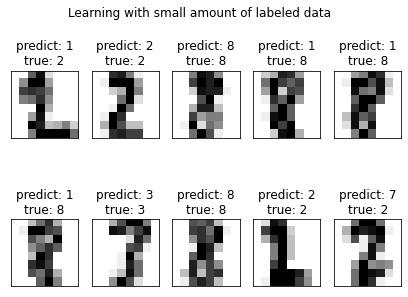

In [28]:
true_labels = y[unlabeled_set]

cm = confusion_matrix(true_labels, predicted_labels, labels=lp_model.classes_)

print("Label Spreading model: %d labeled & %d unlabeled points (%d total)" %
      (n_labeled_points, n_total_samples - n_labeled_points, n_total_samples))

print(classification_report(true_labels, predicted_labels))

print("Confusion matrix")
print(cm)

# #############################################################################
# Calculate uncertainty values for each transduced distribution
pred_entropies = stats.distributions.entropy(lp_model.label_distributions_.T)

# #############################################################################
# Pick the top 10 most uncertain labels
uncertainty_index = np.argsort(pred_entropies)[-10:]

# #############################################################################
# Plot
f = plt.figure(figsize=(7, 5))
for index, image_index in enumerate(uncertainty_index):
    image = images[image_index]

    sub = f.add_subplot(2, 5, index + 1)
    sub.imshow(image, cmap=plt.cm.gray_r)
    plt.xticks([])
    plt.yticks([])
    sub.set_title('predict: %i\ntrue: %i' % (
        lp_model.transduction_[image_index], y[image_index]))

f.suptitle('Learning with small amount of labeled data')
plt.show()

# End